In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230404152512034886'

# Exploring the ways of changing the learning rate

In [2]:
import numpy
import matplotlib.pyplot
from IPython import display

In [3]:
# function and it's derivative
x = numpy.linspace(-2,2,2001)

# function as a function
def fx(x):
    return 3*x**2 - 3*x +4

def deriv(x):
    return 6*x-3

## Gradient Descent with fixed learning rate

In [9]:
localmin = numpy.random.choice(x,1)
initval = localmin[:]

learning_rate = 0.01
training_epochs = 50

modelparamsFixed = numpy.zeros((training_epochs,3))

for i in range(training_epochs):
    
    grad = deriv(localmin)
    
    lr = learning_rate
    
    localmin = localmin - lr*grad

    # print(learning_rate.shape)
    
    modelparamsFixed[i,:] = localmin[0],grad[0],lr

# Gradient descent with a grdient based learning rate

In [17]:
localmin = numpy.random.choice(x,1)

initval = localmin[:]

learning_rate = .01
training_epochs = 50

modelparamsFixedGrad = numpy.zeros((training_epochs,3))
for i in range(training_epochs):
    
    grad = deriv(localmin)
    
    lr = learning_rate*numpy.abs(grad)
    
    localmin = localmin - lr*grad
    
    modelparamsFixedGrad[i,:] = localmin[0],grad[0],lr[0]

array([0.00295602])

## Gradient descent using a time-based learning rate

In [21]:
learning_rate = 0.1
localmin = initval

modelparamsTime = numpy.zeros((training_epochs,3))
for i in range(training_epochs):
    grad = deriv(localmin)
    lr = learning_rate*(1-(i+1)/training_epochs)
    localmin = localmin - lr*grad
    modelparamsTime[i,:] = localmin[0],grad[0],lr

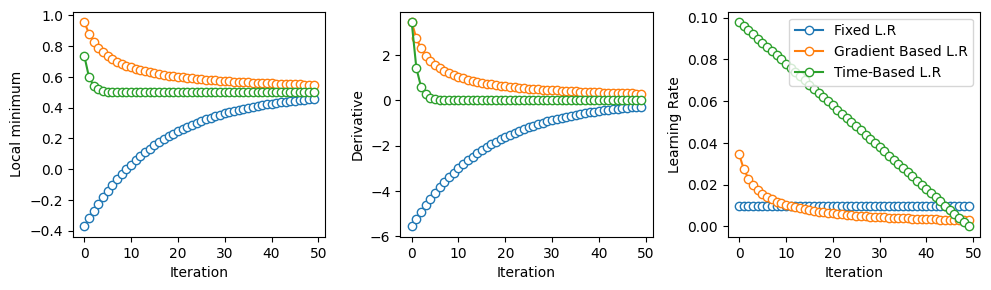

In [23]:
# plot the results

fig, ax = matplotlib.pyplot.subplots(1,3,figsize=(10,3))

for i in range(3):
    ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelparamsFixedGrad[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
    ax[i].set_xlabel('Iteration')
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed L.R','Gradient Based L.R','Time-Based L.R'])

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()